## Exercise 4.2

####  (I) Build a deep neural network with 5 hidden layers of 100 neurons each (with Xavier initialization, batch normalization, and ReLU activation function), and train it using Adam optimizer and early stopping on the MNIST dataset. Hint: you will need a softmax output layer with ten neurons for this classification task. Hint: make sure you save the checkpoints at regular intervals and save the final model to use it later. Show the misclassification rates and sample results. What accuracy can you achieve? Is the model overfitting the training data? 

#### Run Neural Network

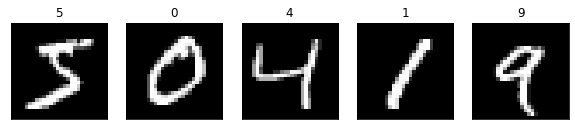

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

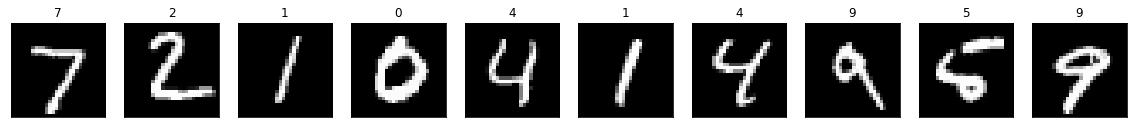

313/313 [==============================] - 0s 1ms/step - loss: 0.1508 - acc: 0.9591A: 0s - loss: 0.1592 - acc: 0.95
Accuracy: 95.91


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras import initializers

# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)
initializer = initializers.GlorotNormal()

# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

# Train the Neural Network model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

##### Compare the results to the results of all the techniques you compared in Exercise 4.1.

### (II) Add dropout (with an appropriate predefined dropout rate) to every layer, train the network again, and compare the results. Discuss your observations.

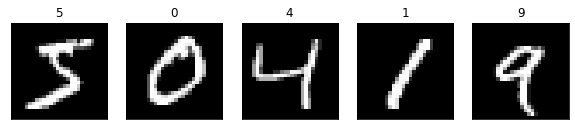

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9897 - acc: 0.7507 - val_loss: 0.2629 - val_acc: 0.9232oss: 1.2449 - ac
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3379 - acc: 0.9041 - val_loss: 0.2022 - val_acc: 0.9427
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2594 - acc: 0.9284 - val_loss: 0.1744 - val_acc: 0.9515
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2254 - acc: 0.9398 - val_loss: 0.1567 - val_acc: 0.9595 3s - loss: 0.2258 - - ETA: 3s - loss
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1946 - acc: 0.9478 - val_loss: 0.1310 - val_acc: 0.9622 loss: 0.2029 - acc: 0. - ETA: 4s - loss: 0.2012 - acc:  - - ETA: 0s - loss: 0.1967 - a


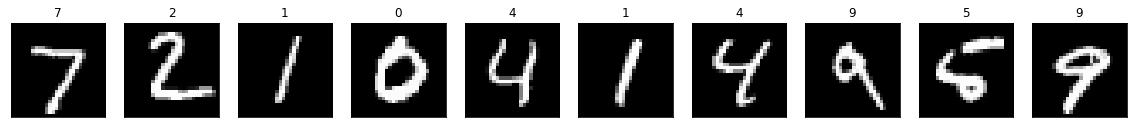

313/313 [==============================] - 1s 3ms/step - loss: 0.1310 - acc: 0.9622A: 0s - loss: 0.1766 - ac
Accuracy: 96.22


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Dropout
from tensorflow.keras import initializers

# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

initializer = initializers.GlorotNormal()
do = 0.1

# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dropout(do))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dropout(do))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dropout(do))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dropout(do))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dropout(do))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dense(10, activation='softmax'))

# model.summary()

model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

# Train the Neural Network model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))